In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [4]:
print(ROOT.TMath.PoissonI(76,75))


0.04540927401898181


In [28]:
for t in range(50):
    prob = 0.
    val = 73.+0.1*t
    for i in range(70,80):
        prob += ROOT.TMath.PoissonI(i,val)
    print( str(val)+"  "+str(prob)+"  "+str(1.-prob)+"  "+str( pow(1-prob,43) ) ) 

73.0  0.4320383941431325  0.5679616058568675  2.727194253157453e-11
73.1  0.4327755604832332  0.5672244395167668  2.5790644203527114e-11
73.2  0.4334601016074134  0.5665398983925867  2.44856430497401e-11
73.3  0.434091904573942  0.565908095426058  2.333855620980539e-11
73.4  0.43467087586831005  0.56532912413169  2.2333586164766773e-11
73.5  0.43519694137586834  0.5648030586241317  2.1457183564872976e-11
73.6  0.4356700463436783  0.5643299536563218  2.069776285325214e-11
73.7  0.43609015533023393  0.5639098446697661  2.004546292280297e-11
73.8  0.4364572521444033  0.5635427478555968  1.9491946348709326e-11
73.9  0.4367713397731606  0.5632286602268394  1.9030231844543462e-11
74.0  0.4370324402978423  0.5629675597021577  1.8654555521554787e-11
74.1  0.43724059480006167  0.5627594051999383  1.8360257321145132e-11
74.2  0.43739586325651447  0.5626041367434855  1.8143689671944356e-11
74.3  0.4374983244233278  0.5625016755766722  1.8002146007209148e-11
74.4  0.43754807570984  0.5624519242901

1.000000000000019
0.43754807570984
0.56245192429016


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


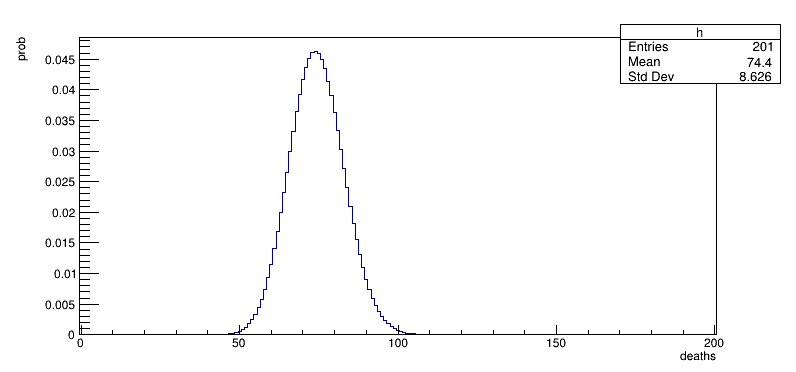

In [17]:
canv = ROOT.TCanvas("canv","canv",800,400)
h = ROOT.TH1F("h",";deaths;prob",201,-0.5,200.5)
summa = 0.
prob70=0.0
for i in range(201):
    h[i+1] = VE(ROOT.TMath.PoissonI(i,74.4),0)
    summa += ROOT.TMath.PoissonI(i,74.4)
    if i>69 and i<80:
        prob70 += ROOT.TMath.PoissonI(i,74.4)
ROOT.gPad.SetLogy(False)
print(summa)
print(prob70)
print(1.-prob70)
h.Draw("hist")
canv.Draw()

In [22]:
pow(0.5625,43)

1.7999840289934567e-11

Warning in <TROOT::Append>: Replacing existing TH1: ho (Potential memory leak).


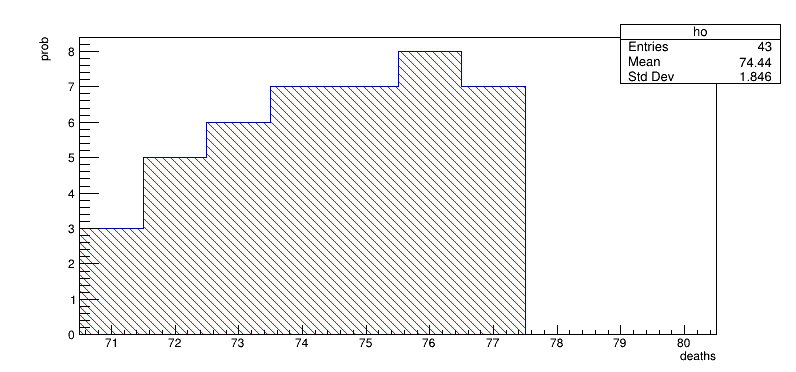

In [26]:
dd = [73, 77, 74, 76, 73, 71, 75, 77, 74, 72, 76, 73, 77, 75, 72, 76, 
      77, 74, 75, 71, 76, 72, 74, 77, 73, 75, 76, 74, 72, 76, 77, 73, 
      75, 76, 71, 75, 74, 77, 73, 76, 74, 72, 75]
ho = ROOT.TH1F("ho",";deaths;prob",10,70.5,80.5)
for d in dd:
    ho.Fill(d)
    
ho.SetFillColor(2)
ho.SetFillStyle(3005)
ho.Draw("hist")
canv.Draw()